In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\Admin\Downloads\Wine_clust (1).csv")

In [3]:
data.head(3)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [4]:
data.shape

(178, 13)

In [5]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [6]:
data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [7]:
data.isna().sum()# no missing values

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [8]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Length: 178, dtype: bool

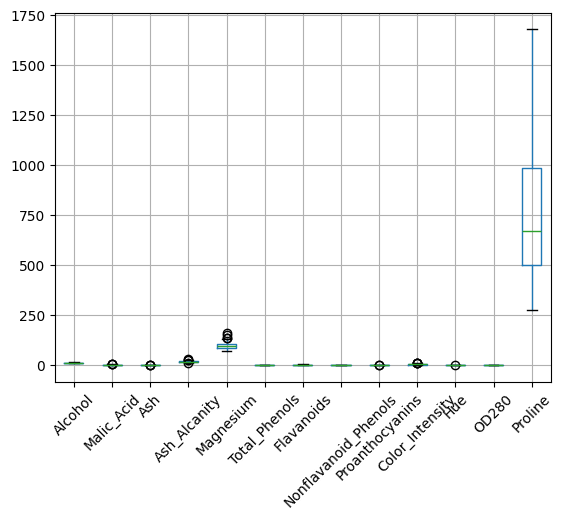

In [9]:
data.boxplot()
plt.xticks(rotation = 45)
plt.show()

In [10]:
def remove_outliers(data, column):
    
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
        
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data[column] = data[column].clip(upper = upper_bound)
    data[column] = data[column].clip(lower = lower_bound)
        
    return data[column]

In [11]:
for col in data:
    data[col] = remove_outliers(data, col)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(data)


In [13]:
result = {'Algorithm:' : [],
          'Silhoutte Score:' : []
        }
result_df = pd.DataFrame(result)
result_df

,Algorithm:,Silhoutte Score:


In [14]:
# DOING KMEANS

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [15]:
wcss = []
inertia = []
silhouette_scores = []

for i in range(2,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    y_kmeans = kmeans.fit_predict(x_scaled)
    s_score = silhouette_score(x_scaled, y_kmeans)
    silhouette_scores.append(s_score)

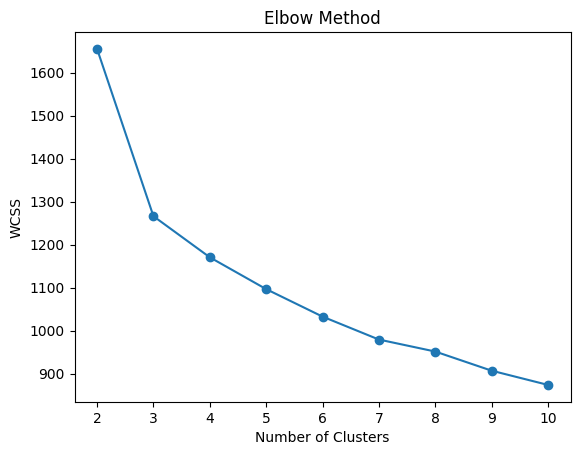

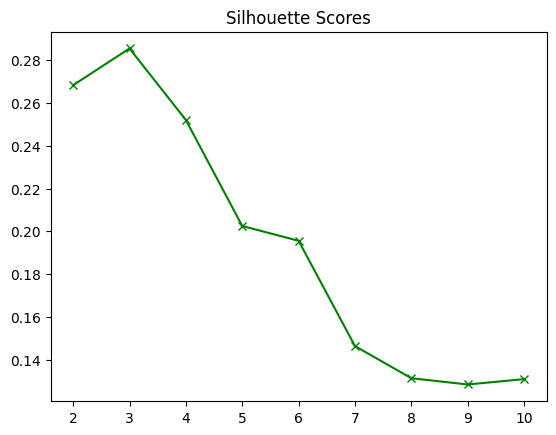

In [16]:
plt.plot(range(2,11), wcss,marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

plt.plot(range(2,11), silhouette_scores, 'gx-')
plt.title('Silhouette Scores')
plt.show()

In [17]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)

y_kmeans1 = kmeans.fit_predict(x_scaled)

In [18]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)

y_kmeans2 = kmeans.fit_predict(x_scaled)
s_score1 = silhouette_score(x_scaled, y_kmeans2)
silhouette_scores.append(s_score1)
result_df.loc[len(result_df)] = ['K-Means', s_score1]

In [19]:
y_kmeans1

array([2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 1, 3, 1,
       3, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 1, 3, 3, 3, 0, 1, 3, 3, 1,
       3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1,
       1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [20]:
y_kmeans2

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [21]:
data['Cluster'] = y_kmeans2
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [22]:
# DOING FEATURE REDUCTION FOR BETTER RESULTS

from sklearn.decomposition import PCA

pca = PCA()
X_new = pca.fit_transform(x_scaled)

In [23]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.36475803, 0.19609775, 0.10911182, 0.07062378, 0.06296983,
       0.04815067, 0.04031504, 0.02744533, 0.02232516, 0.01931106,
       0.01755433, 0.01326634, 0.00807088])

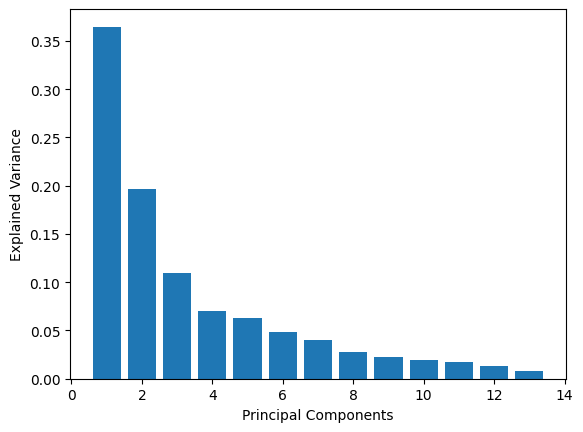

In [24]:
plt.bar(range(1, len(explained_variance)+1), explained_variance)
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance")
plt.show()

In [25]:
X_new.shape

(178, 13)

In [26]:
pca_2=PCA(n_components=5)
X_new_2=pca_2.fit_transform(x_scaled)

In [27]:
X_new_2.shape

(178, 5)

In [28]:
exp_var=pca_2.explained_variance_ratio_ #how much percentage we get from these components
print("Percentage sum of explained variance: {}%".format(np.round(np.sum(exp_var)*100, 2)))

Percentage sum of explained variance: 80.36%


In [29]:
pca_2.get_covariance()

array([[ 1.00657072,  0.05416513,  0.21385597, -0.31985129,  0.31848465,
         0.3040681 ,  0.24519974, -0.12503825,  0.19982616,  0.55047702,
        -0.09194389,  0.03697414,  0.62453865],
       [ 0.05416513,  0.88327963,  0.15261226,  0.34561145, -0.06981949,
        -0.32595861, -0.40315452,  0.27994644, -0.1827893 ,  0.36980275,
        -0.59631431, -0.42179315, -0.21662805],
       [ 0.21385597,  0.15261226,  1.02167128,  0.4013996 ,  0.3308275 ,
         0.12259603,  0.07706316,  0.20133849,  0.05998827,  0.26626202,
        -0.07127333, -0.02922966,  0.20739994],
       [-0.31985129,  0.34561145,  0.4013996 ,  1.00234324, -0.06749665,
        -0.32412201, -0.35375744,  0.40929337, -0.22649062, -0.02390639,
        -0.28204359, -0.28352865, -0.42328751],
       [ 0.31848465, -0.06981949,  0.3308275 , -0.06749665,  0.97598812,
         0.22383278,  0.22024744, -0.30057181,  0.16660963,  0.25964797,
         0.02496547,  0.07789513,  0.41178233],
       [ 0.3040681 , -0.325958

In [30]:
wcss = []
inertia = []
silhouette_scores = []

for i in range(2,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_new_2)
    wcss.append(kmeans.inertia_)
    y_kmeans3 = kmeans.fit_predict(X_new_2)
    silhouette_scores2 = silhouette_scores.append(silhouette_score(X_new_2, y_kmeans3))

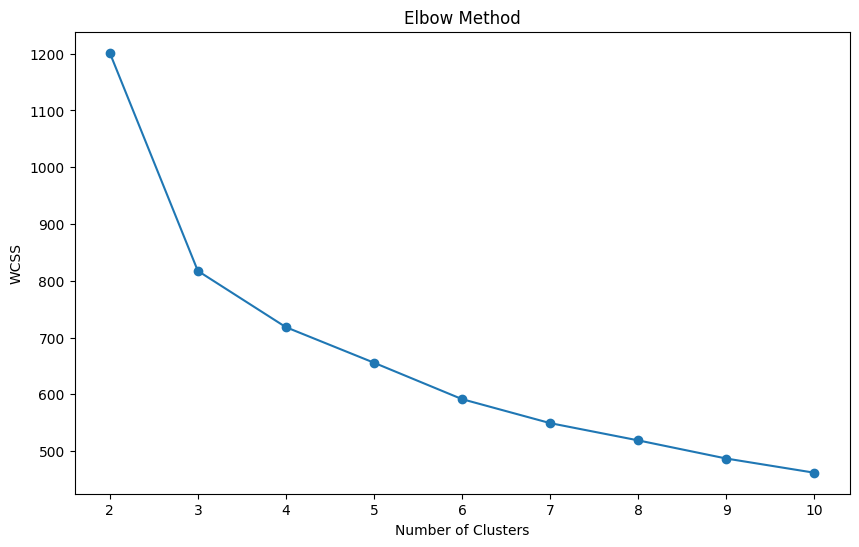

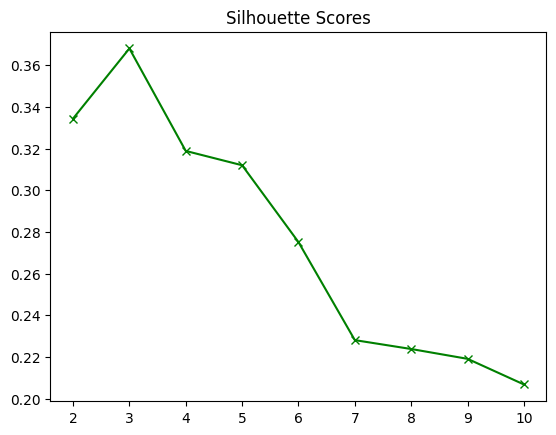

In [31]:
plt.figure(figsize = (10,6))
plt.plot(range(2,11), wcss,marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

plt.plot(range(2,11), silhouette_scores, 'gx-')
plt.title('Silhouette Scores')
plt.show()

In [32]:
# COMPUTING KMEANS AFTER PCA

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)

y_kmeans4 = kmeans.fit_predict(X_new_2)
s_score2 = silhouette_score(X_new_2, y_kmeans4)
silhouette_scores.append(s_score2)
result_df.loc[len(result_df)] = ['Kmeans_pca', s_score2]

In [33]:
data['Cluster'] = y_kmeans4
data.head()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


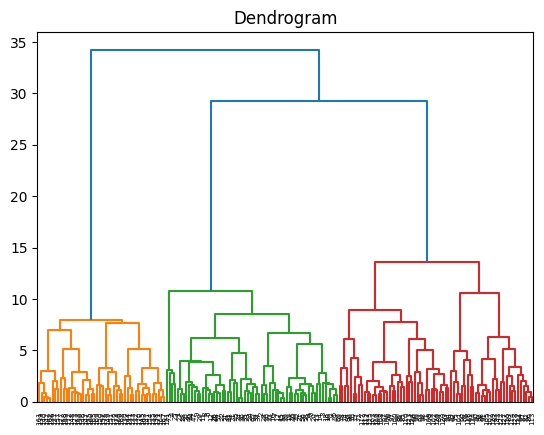

In [34]:
# EXPLORING DENDOGRAM

from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch

linkage_matrix = linkage(X_new_2, method='ward')
dendrogram(linkage_matrix)
plt.title("Dendrogram")
plt.show()

In [35]:
# DOING AGGLOMERATIVE CLUSTERING

from sklearn.cluster import AgglomerativeClustering

silhouette_scores = []
for i in range(2,8):
  
    agg_hc = AgglomerativeClustering(n_clusters = i,
                             metric = 'euclidean',
                             linkage = 'ward')
    c_pred = agg_hc.fit_predict(X_new_2)
    s_score = silhouette_score(X_new_2, c_pred)
    silhouette_scores.append(s_score)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11452\2422394640.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


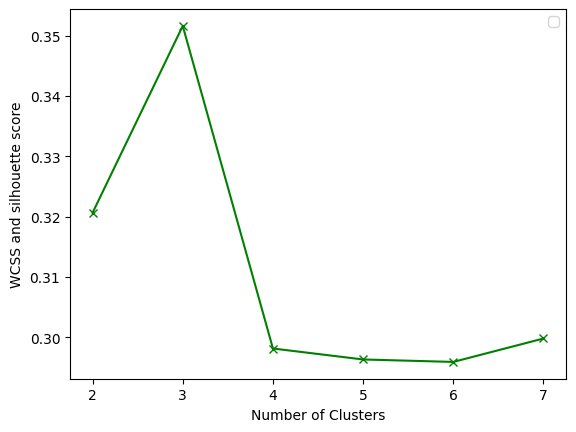

In [36]:
plt.plot(range(2,8), silhouette_scores, 'gx-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS and silhouette score')
plt.legend()
plt.show()

In [37]:
agg_hc = AgglomerativeClustering(n_clusters = 3,
                             metric = 'euclidean',
                             linkage = 'ward')
c_pred = agg_hc.fit_predict(X_new_2)
s_score = silhouette_score(X_new_2, c_pred)
silhouette_scores.append(s_score)
result_df.loc[len(result_df)] = ['Agglomerative', s_score]

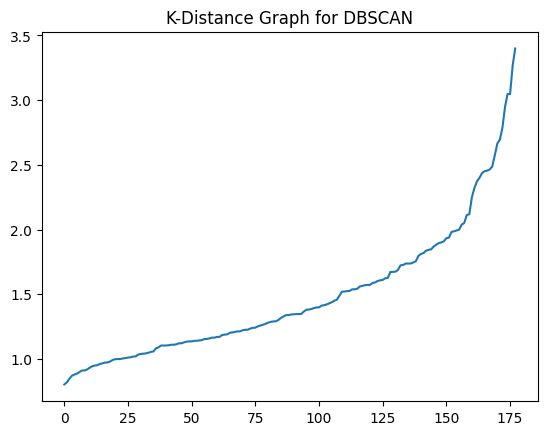

DBSCAN found fewer than 2 clusters. Silhouette Score is undefined.


In [39]:
# from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

# Create DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=10)

# k-distance plot to choose eps
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X_new_2)
distances, indices = nbrs.kneighbors(X_new_2)
distances = np.sort(distances[:, 4])
plt.plot(distances)
plt.title("K-Distance Graph for DBSCAN")
plt.show()

# Fit DBSCAN
labels_dbscan = dbscan.fit_predict(X_new_2)

# Count clusters (excluding noise)
n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)

if n_clusters > 1:
    mask = labels_dbscan != -1
    score_dbscan = silhouette_score(X_new_2[mask], labels_dbscan[mask])
    print(f"Silhouette Score for DBSCAN: {score_dbscan:.3f}")
else:
    score_dbscan = None
    print("DBSCAN found fewer than 2 clusters. Silhouette Score is undefined.")

# Add result
result_df.loc[len(result_df)] = ['DBSCAN', score_dbscan if score_dbscan is not None else 'N/A']


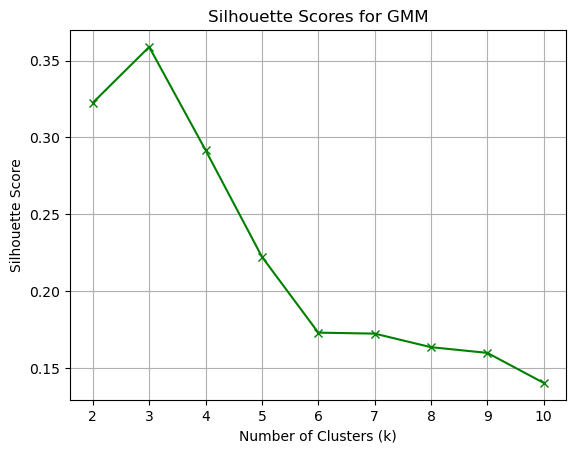

In [ ]:
#DOING GAUSSIAN MIXTURE
from sklearn.mixture import GaussianMixture

gmm_scores = []
ks = range(2, 11)

for k in ks:
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(X_new_2)
    score = silhouette_score(X_new_2, labels)
    gmm_scores.append(score)

# Now plot
import matplotlib.pyplot as plt

plt.plot(ks, gmm_scores, 'gx-')
plt.title('Silhouette Scores for GMM')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

gmm = GaussianMixture(n_components=3, random_state=42)
labels_gmm = gmm.fit_predict(X_new_2)
score_gmm = silhouette_score(X_new_2, labels_gmm)
result_df.loc[len(result_df)] = ['GaussianMixture', score_gmm]

In [ ]:
result_df

,Algorithm:,Silhoutte Score:
0,K-Means,0.285463
1,Kmeans_pca,0.36802
2,Agglomerative,0.351588
3,DBSCAN,<function silhouette_score at 0x000001E2A4F86520>
4,GaussianMixture,0.358869
